In [78]:
import pandas as pd
from pandas import DataFrame
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style


# import data with user sessions info 
df = pd.read_csv('fact_user_session.csv')

# import data with channel info to associate information
df_channels = pd.read_csv('channel.csv')

#import data with users info to associate 
df_users = pd.read_csv('users_sample.csv')


In [91]:
# matplob style for graphs
style.use('dark_background')

In [40]:
# description  
display(df.columns)
display(df.shape)

Index(['SESSION_ID', 'DEVICEUSER_ID', 'CHANNEL_ID', 'SESSION_START',
       'SESSION_END', 'DURATION'],
      dtype='object')

(410536, 6)

In [41]:
display(df_channels.columns)
display(df_channels.shape)

Index(['Channel_id', 'Channel_name', 'Active'], dtype='object')

(25, 3)

In [9]:
"""
SPECIFIC TO CHANNEL
"""

'\nSPECIFIC TO CHANNEL\n'

In [81]:
# merge tables to get associated 'channel names' and 'channel ids'
df = pd.merge(df, df_channels, left_on=['CHANNEL_ID'],
     right_on=['Channel_id'],
     how='left')

# drop unnecesary columns from other channels dataframe
df.drop(columns = ['Active'], inplace = True) 

In [82]:
# remove NaN values for accuracy 
df= df[df['Channel_name'].notna()]
df

,SESSION_ID,DEVICEUSER_ID,CHANNEL_ID,SESSION_START,SESSION_END,DURATION,Channel_id,Channel_name
0,387687,5e3d2735ffc977001ea26e45,57ea31912bb6581000092e89,2021-01-10 07:17:39.071,2021-01-10 07:50:54.071,1995,57ea31912bb6581000092e89,Óčko Star
1,460589,5e3d2735ffc977001ea26e45,57ea31912bb6581000092e89,2021-01-10 07:51:19.181,2021-01-10 07:51:34.181,15,57ea31912bb6581000092e89,Óčko Star
2,461871,5e3d2735ffc977001ea26e45,57ea31912bb6581000092e89,2021-01-10 07:51:50.266,2021-01-10 07:52:05.266,15,57ea31912bb6581000092e89,Óčko Star
3,463162,5e3d2735ffc977001ea26e45,57ea31912bb6581000092e89,2021-01-10 07:52:21.379,2021-01-10 07:52:36.379,15,57ea31912bb6581000092e89,Óčko Star
4,464429,5e3d2735ffc977001ea26e45,57ea31912bb6581000092e89,2021-01-10 07:52:52.544,2021-01-10 07:52:52.544,0,57ea31912bb6581000092e89,Óčko Star
...,...,...,...,...,...,...,...,...
410531,529593,5ffe18ace8df6a0017525041,57ea31912bb6581000092e89,2021-01-12 21:46:20.195,2021-01-12 21:46:20.195,0,57ea31912bb6581000092e89,Óčko Star
410532,529766,5ffe18b0e8df6a001752508a,57ea31912bb6581000092e89,2021-01-12 21:46:24.401,2021-01-12 21:46:39.401,15,57ea31912bb6581000092e89,Óčko Star
410533,529866,5ffe18b2e8df6a00175250b5,57ea31912bb6581000092e89,2021-01-12 21:46:26.726,2021-01-12 21:46:41.726,15,57ea31912bb6581000092e89,Óčko Star
410534,530155,5ffe18b98df5f60017d4e3e6,57ea31912bb6581000092e89,2021-01-12 21:46:33.673,2021-01-12 21:46:33.673,0,57ea31912bb6581000092e89,Óčko Star


In [83]:
# get unique channel identifiers
channels = set(df['Channel_name'])
channels

{'Dajto', 'Óčko Star'}

C:\Users\Ahn\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


User count per hour for Óčko Star channel



SESSION_START
08:00    19223
09:00    12987
10:00     4056
11:00     4408
12:00     9886
13:00     9982
14:00     7245
Name: DEVICEUSER_ID, dtype: int64

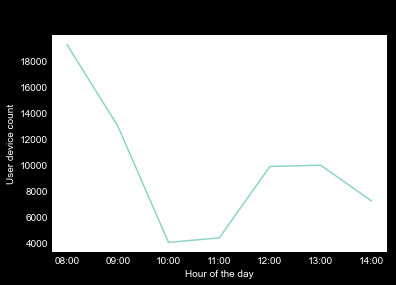

C:\Users\Ahn\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


User count per hour for Dajto channel



SESSION_START
08:00     850
09:00     912
10:00     948
11:00    1073
12:00    1130
13:00    1157
14:00    1155
Name: DEVICEUSER_ID, dtype: int64

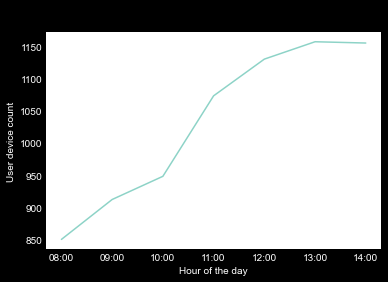

In [67]:
# Time when people tend to watch tv per channel and time range

for channel in channels:
    # filter by channel
    df_c = df.loc[df["Channel_name"] == channel]
    df_c.SESSION_START = pd.to_datetime(df_c.SESSION_START) # convert time values to datetime type
    
    
    # convert 'Session_start' to hours and group by user to get count of users per hour
    frequency_hour = df_c.groupby([pd.Grouper(key = 'SESSION_START', freq = 'H'), df_c.DEVICEUSER_ID]).size().reset_index( name = 'user devices count')
    frequency_hour['SESSION_START'] = frequency_hour['SESSION_START'].dt.strftime('%H:%M')

    #filter by specific hours - define targeted range: 08:00 - 14:00
    frequency_hour = frequency_hour[(frequency_hour['SESSION_START'] >=  '08:00') & (frequency_hour['SESSION_START'] <= '14:00')]

    # total unique user per hour and channel
    hours_users = frequency_hour.groupby('SESSION_START')['DEVICEUSER_ID'].nunique()
    
    # user device count per hour
    print("User count per hour for {channel_name} channel".format(channel_name = channel) + '\n')
    display(hours_users)
    

    # graph - display total count of users watching TV per hour
    hours_users.plot()
    plt.xlabel('Hour of the day')
    plt.ylabel('User device count')
    plt.title('Total count of users watching TV per hour for {channel_name} channel'.format(channel_name = channel) + '\n')
    plt.savefig('t1_deliverable01.png')
    plt.show()



Average time spent per channel



,mean
Channel_name,
Dajto,0 days 00:05:36.460105
Óčko Star,0 days 00:04:17.505053


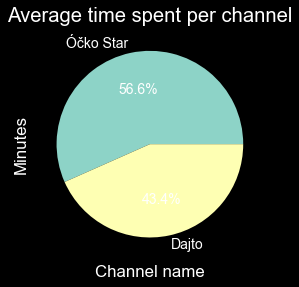

In [92]:
#3 Average time spent per channel 
import datetime

# group by channel
result = df.groupby("Channel_name")["DURATION"].agg([np.mean])
result["mean"] = result["mean"].apply(lambda x: datetime.timedelta(seconds=x))
result

print("\nAverage time spent per channel\n")
display(result)

# in percentages and counts
df3 = df[(df["Channel_name"] == "Dajto") | (df["Channel_name"] == "Óčko Star")]

x =  df3.Channel_name.unique() 
y = result['mean'].to_numpy()

# graphs
# percentage per channel
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.title('Average time spent per channel')
plt.savefig('t1_deliverable02.png')

# counts per channel
plt.plot(x, y)
plt.xlabel('Channel name')
plt.ylabel('Minutes')
plt.title('Average time spent per channel')
plt.savefig('t1_deliverable03.png')
plt.show()


In [83]:
"""
GENERAL DATA PER CHANNELS
"""

0         Óčko Star
1         Óčko Star
2         Óčko Star
3         Óčko Star
4         Óčko Star
            ...    
410531    Óčko Star
410532    Óčko Star
410533    Óčko Star
410534    Óčko Star
410535    Óčko Star
Name: Channel_name, Length: 410536, dtype: object


Sessions per channel



Óčko Star    361798
Dajto         48728
Name: Channel_name, dtype: int64

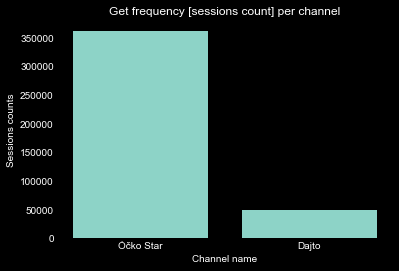

In [59]:
#1 Most watched channels

# Create series with frequency count per channel (to get channel with more sessions/most watched channel)
frequency_channel = df['Channel_name'].value_counts()
x = df['Channel_name'].unique()

plt.bar(x, frequency_channel)
#frequency_channel
print("\nSessions per channel\n")
display(df['Channel_name'].value_counts())
plt.xlabel('Channel name')
plt.ylabel('Sessions counts')
plt.title('Get frequency [sessions count] per channel') # TV viewership, unique sessions per channel
plt.savefig('t1_deliverable04.png')
plt.show()


In [53]:
frequency_channel

Óčko Star    361798
Dajto         48728
Name: Channel_name, dtype: int64


Users per channel



Channel_name
Dajto          4958
Óčko Star    108800
Name: DEVICEUSER_ID, dtype: int64

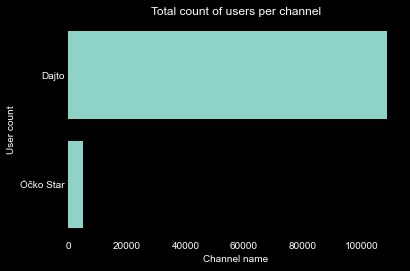

In [65]:
#2 Total unique users per channel

x = df['Channel_name'].unique()
users_channel = df.groupby('Channel_name')['DEVICEUSER_ID'].nunique()

plt.barh(x, users_channel)

print("\nUsers per channel\n")
display(users_channel)

plt.xlabel('Channel name')
plt.ylabel('User count')
plt.title('Total count of users per channel')
plt.savefig('t1_deliverable05.png')
plt.show()

In [60]:
users_channel

Channel_name
Dajto          4958
Óčko Star    108800
Name: DEVICEUSER_ID, dtype: int64

In [38]:
# IP's for testing: http://upd.emule-security.org/ipfilter.zip
x = df_users
x

,IP_ADDRESS,DEVICEUSER_ID,city
0,88.101.215.7,5e3d7a47478608001e2e261e,Prague
1,188.123.115.239,5edbb099c05b71001e77a4b2,Skalica
2,195.168.207.127,5f95756d38df540017dfb646,Liptovsky Hradok
3,178.143.34.66,5ef4b3b4a4d085001e8bf77d,NaN
4,188.175.239.85,5e4096224fa2a2001eeb98fe,Olomouc


In [20]:
# Algorithm created to get user's location with IP address and calculate users count per channel and region
import pandas as pd
from geolite2 import geolite2

# function
def get_country(ip):
    try:
        x = geo.get(ip)

    
    except ValueError:
        return pd.np.nan
    
    try:
        #specify the value you want, get its name, choose language
        return x['city']['names']['en'] if x else pd.np.nan
    
    except KeyError:
        
        return pd.np.nan

# resolve countries and create new tables 
geo = geolite2.reader()

# get unique IPs
unique_ips = x['IP_ADDRESS'].unique()

# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)

# create new column with city/region where the user is located - map IP --> country
df_users['city'] = x['IP_ADDRESS'].map(unique_ips.apply(get_country))

geolite2.close()

<ipython-input-20-1c211579230b>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [19]:
x

,IP_ADDRESS,DEVICEUSER_ID,city
0,88.101.215.7,5e3d7a47478608001e2e261e,Prague
1,188.123.115.239,5edbb099c05b71001e77a4b2,Skalica
2,195.168.207.127,5f95756d38df540017dfb646,Liptovsky Hradok
3,178.143.34.66,5ef4b3b4a4d085001e8bf77d,NaN
4,188.175.239.85,5e4096224fa2a2001eeb98fe,Olomouc


In [ ]:
# merge datasets to have the user device id linked to the ip address and country (future task)
